In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import os
from collections import Counter

import sys
sys.path.append('../..')
from src.utils.parse_cas_operon_tab import parse_cas_operon_tab

# Plot the distributions of the Cas-system types found in the archaeal genomes

In [16]:
def plot_distributions(data):
    """
    Dict containing {
        "type_name": abundance
    }
    """
    data = dict(sorted(data.items(), key=lambda x: x[1], reverse=True))
    names = list(data.keys())
    values = list(data.values())

    plt.figure(figsize=(10, 5))
    plt.bar(names, values)

    plt.xlabel("Type")
    plt.ylabel("Abundance")
    plt.title("Distribution Histogram")
    plt.xticks(rotation=45, ha="right")

    plt.tight_layout()
    plt.show()

def retrieve_cas_system_types_found(res_dir : str):
    """
    """
    subfolders = os.listdir(res_dir)
    all_cas_systems_found = []
    
    for sub in subfolders:
        cas_operon_path = os.path.join(res_dir, sub, "cas_operons.tab")

        if os.path.exists(cas_operon_path):
            res = parse_cas_operon_tab(cas_operon_path)
            cas_systems_found = res["Prediction"]
            all_cas_systems_found.extend(cas_systems_found)

        else:
            print(f"No cas_operon.tab file in {sub}")

    return all_cas_systems_found

No cas_operon.tab file in 2053491.96
No cas_operon.tab file in 2053489.176
No cas_operon.tab file in 2026747.123


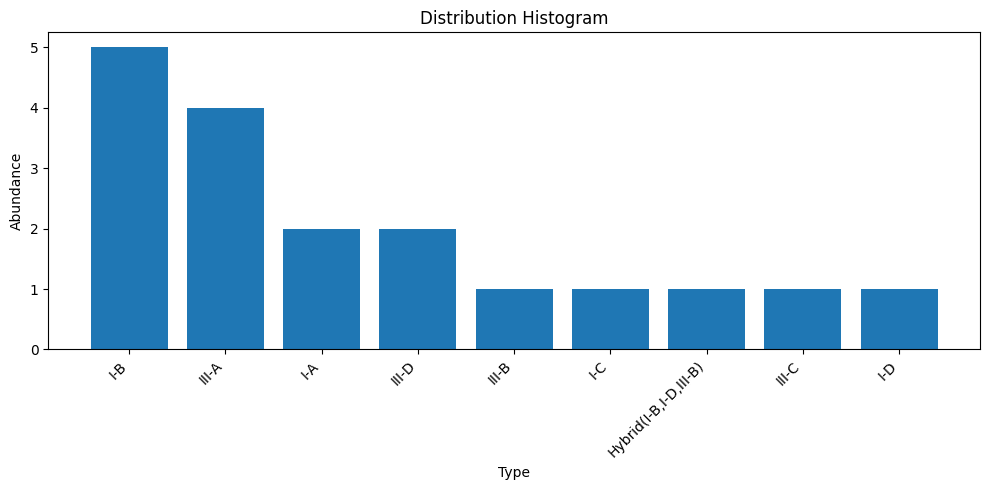

In [17]:
# ASGARD
path = "/u/home/praktikum/praktikum/identify_potential_antiCRISPR_cas_genes/out/cctyper/asgard"
result = dict(Counter(retrieve_cas_system_types_found(path)))
plot_distributions(result)

No cas_operon.tab file in 2886383.12
No cas_operon.tab file in 2026736.82
No cas_operon.tab file in 2099673.6
No cas_operon.tab file in 2026803.482


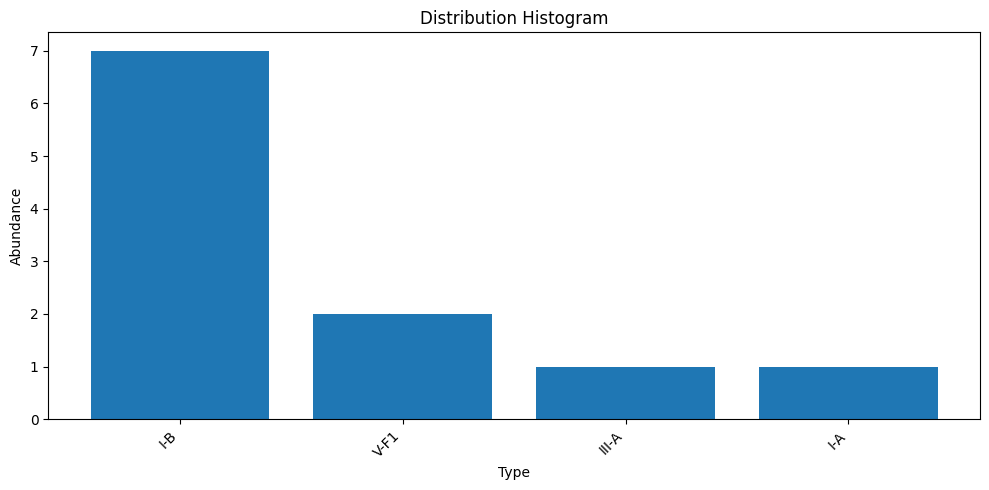

In [18]:
# DPANN
path = "/u/home/praktikum/praktikum/identify_potential_antiCRISPR_cas_genes/out/cctyper/dpann"
result = dict(Counter(retrieve_cas_system_types_found(path)))
plot_distributions(result)

No cas_operon.tab file in 2026739.72


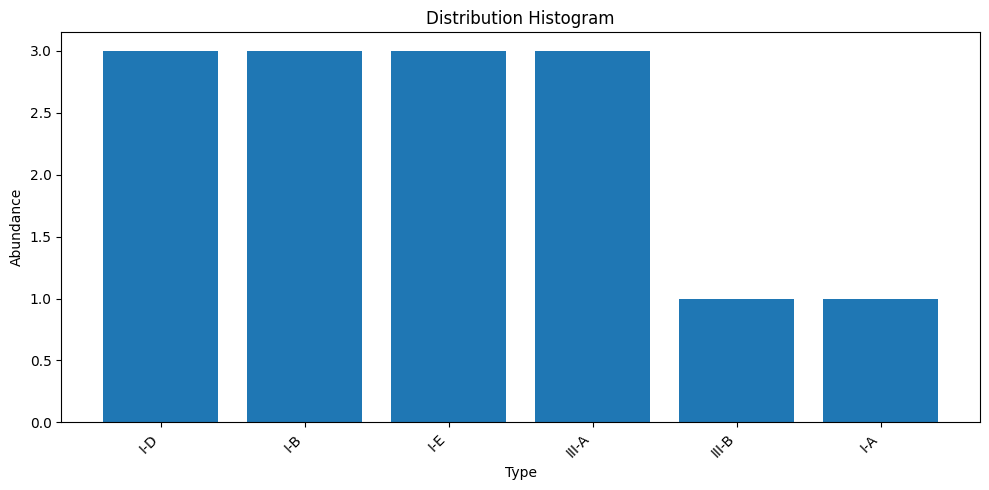

In [19]:
# EURY
path = "/u/home/praktikum/praktikum/identify_potential_antiCRISPR_cas_genes/out/cctyper/eury"
result = dict(Counter(retrieve_cas_system_types_found(path)))
plot_distributions(result)

No cas_operon.tab file in 2202732.11
No cas_operon.tab file in 2184738.154


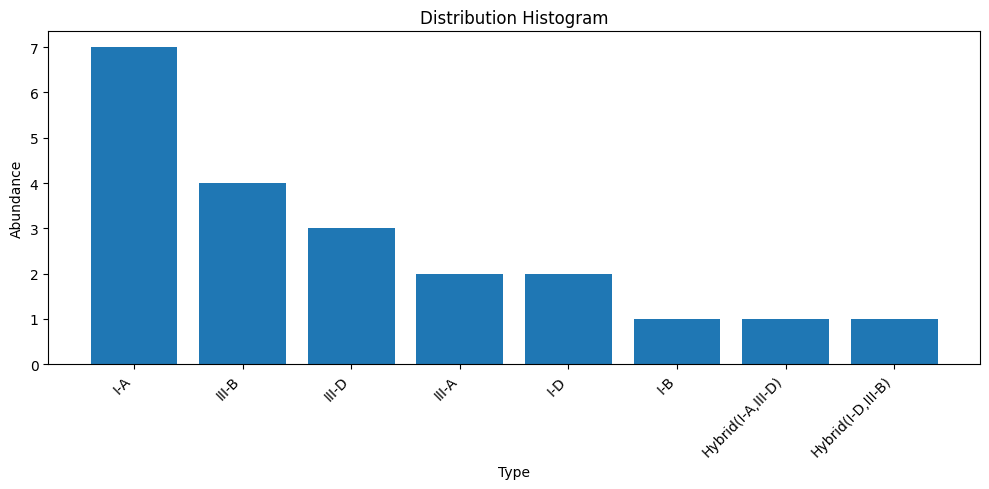

In [20]:
#  TACK
path = "/u/home/praktikum/praktikum/identify_potential_antiCRISPR_cas_genes/out/cctyper/tack"
result = dict(Counter(retrieve_cas_system_types_found(path)))
plot_distributions(result)

# using any CRISPR-arrays found, how many spacers are possible in the dataset? For example the histogram on the bottom of the scatterplot is the number shows the distribution of the number of spacers per genome across all genomes in the dataset 

In [6]:
# using any CRISPR-arrays found, how many spacers are possible in the dataset? For example the histogram on the bottom of the scatterplot is the number shows the distribution of the number of spacers per genome across all genomes in the dataset 

In [7]:
# what is the average length (in nucleotides) of the spacers found? 